# Algerian Forest Fires - Linear Regression Assignment

**Name - krunal patel**

**Student ID - 936008**

analyzing the Algerian forest fire dataset to predict the Fire Weather Index (FWI) using linear regression and its regularization variants.

## 1. Data Cleaning and Preprocessing


In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Preview the data
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#Checking data

In [4]:
#checking data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [3]:
# Check for null values

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [5]:
# Feature selection (drop non-useful columns like 'day', 'month' if present)
features = df.drop(['FWI'], axis=1)  # replace with actual feature column names if needed
target = df['FWI']

## 2. Data Visualization and Observations

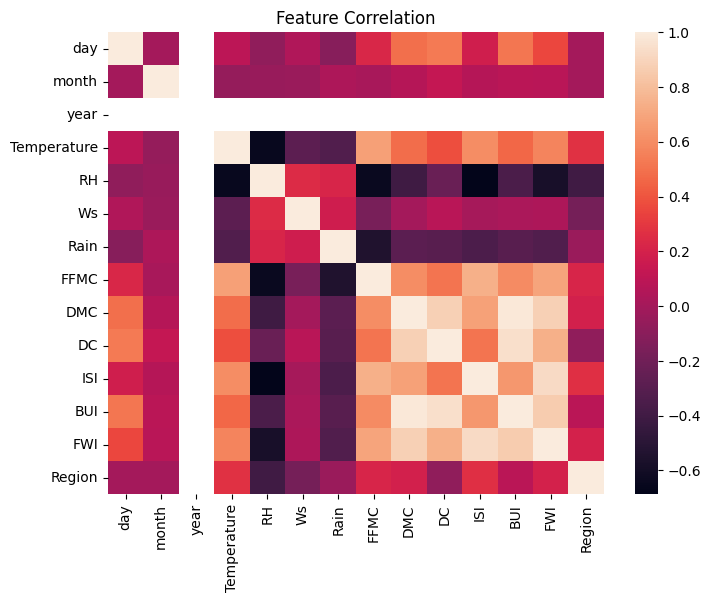

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap of  Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr())
plt.title('Feature Correlation')
plt.show()

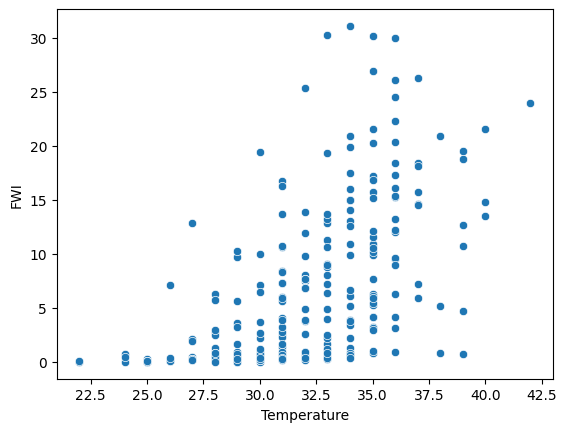

In [9]:
# Example: Scatterplot between Temperature and FWI
sns.scatterplot(data=df, x='Temperature', y='FWI')
plt.show()

**Observations:**
- Temperature and wind appear ot be positively correlated to FWI.
- RH might be negatively correlated.


## 3. Model Development and Analysis


In [11]:
df['Classes'] = df['Classes'].str.strip()
features = df.drop(['FWI', 'Classes'], axis=1)  # adjust as needed
target = df['FWI']

In [12]:
features.dtypes

,0
day,int64
month,int64
year,int64
Temperature,int64
RH,int64
Ws,int64
Rain,float64
FFMC,float64
DMC,float64
DC,float64


In [13]:
features = pd.get_dummies(features)

## model building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

## 4. Model Evaluation and Testing

In [15]:
# Evaluation metrics for Linear Regression
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression R2: 0.9876914472249014
Linear Regression RMSE: 0.6107804887620943
Linear Regression MAE: 0.4551285782066134


In [17]:
# Ridge & Lasso Regression with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Ridge
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, params, cv=10, scoring='r2')
grid_ridge.fit(X_train, y_train)
print("Best Ridge Alpha:", grid_ridge.best_params_)
print("Ridge R2:", grid_ridge.score(X_test, y_test))

# Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, params, cv=10, scoring='r2')
grid_lasso.fit(X_train, y_train)
print("Best Lasso Alpha:", grid_lasso.best_params_)
print("Lasso R2:", grid_lasso.score(X_test, y_test))

Best Ridge Alpha: {'alpha': 10}
Ridge R2: 0.9867954790539605


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.301e+02, tolerance: 1.031e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e+02, tolerance: 1.056e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+02, tolerance: 1.060e

Best Lasso Alpha: {'alpha': 0.1}
Lasso R2: 0.9857711128008882


## 5. Save Final Model with Pickle

In [18]:
# Save the model (example: Ridge)
import pickle


with open('final_model.pkl', 'wb') as f:
    pickle.dump(grid_ridge.best_estimator_, f)

## 6. Conclusion
- Linear regression and its regularized versions (Ridge, Lasso) were tested.
- Ridge performed best with tuned alpha.
- Model was saved using `pickle` and is ready for deployment.

## github
#krunalpatel355/2025S-T3_AML-3104_01.git